<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Group 8: Team Introduction</h2>
</div>

<b>1. KEW JING SHENG - S2021452</b>

<b>2. MUHAMMAD EZLAN - S2116731</b>

<b>3. YUGAVASHINI A/P CHANDRAN - S2101446</b>

<b>4. PUVEEMALAR PARAMESWARAN - S2127371</b>

<b>5. GHAYATHRI A/P RAMANATHAN - 17192245</b>

In [19]:
import os
import math
import pathlib
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import OrderedDict
from scipy.integrate import cumtrapz
from functools import reduce

from IPython.display import display, Markdown, clear_output, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive

import catboost
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor
import shap

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

pd.set_option('display.max_columns', 1000)
pd.options.display.float_format = '{:,.4f}'.format

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Recap: Intitial Questions</h2>
</div>

<img src="img/mosquito.jpg" alt="mosquito" height="400" width="400">

<h3>1. Can we predict local epidemics of <b>Dengue</b> cases?</h3>

<b>Dengue</b> fever is a <code>mosquito-borne</code> disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, <b>Dengue</b> fever can cause severe bleeding, low blood pressure, and even death.

<img src="img/dengue_outbreak.png" alt="outbreak" height="500" width="1000">

<h3>2. Can we gain deeper understanding on variables that will affect the <b>Dengue</b> cases?</h3>

Because it is carried by mosquitoes, the transmission dynamics of <b>Dengue</b> are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Recap: Overview & Motivations</h2>
</div>

<h3>1. Overview</h3>

<a href="https://www.kaggle.com/qianyigang129/dengai-disease-spreading-prediction">Kaggle DengAI Challenge</a>

The general overview of this project is to study <code>variables</code> affecting the <b>Dengue</b> cases and their weightage by analysing public data set regarding the DEN-V field. 

Our goal is to predict the <code>total_cases</code> of <b>dengues</b> for each <code>city</code>, <code>year</code> and <code>weekofyear</code> in the datset. There are 2 cities, San Juan, <b>sj</b> and Iquitos, <b>iq</b>, with the data spanning from period of 2001 to 2021.

<img src="img/data_intro.png" alt="data_intro" height="1000" width="1000">

The data are acquired from Kaggle <b>Kaggle DengAI Challenge</b>.

<b> List of Features </b>
We are provided the following information on a <code>year</code> & <code>weekofyear</code> timescale:

1. <font size="3px" face="Dosis" color=""><b>City & Date Indicators</b></font>
    - <code>city</code>: City abbreviations : <b>sj</b> for San Juan and <b>iq</b> for Iquitos
    - <code>week_start_date</code> : Date given in <b>yyyy-mm-dd</b> format
2. <font size="3px" face="Dosis"><b>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</b></font>
    - <code>precipitation_amt_mm</code> : Total precipitation
3. <font size="3px" face="Dosis"><b>NOAA's (National Oceanic and Atmospheric Administration) NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</b></font>
    - <code>reanalysis_sat_precip_amt_mm</code> : Total precipitation
    - <code>reanalysis_dew_point_temp_k</code> : Mean dew point temperature
    - <code>reanalysis_air_temp_k</code> : Mean air temperature
    - <code>reanalysis_relative_humidity_percent</code> : Mean relative humidity
    - <code>reanalysis_specific_humidity_g_per_kg</code> : Mean specific humidity
    - <code>reanalysis_precip_amt_kg_per_m2</code> : Total precipitation
    - <code>reanalysis_max_air_temp_k</code> : Maximum air temperature
    - <code>reanalysis_min_air_temp_k</code> : Minimum air temperature
    - <code>reanalysis_avg_temp_k</code> : Average air temperature
    - <code>reanalysis_tdtr_k</code> : Diurnal temperature range
3. <font size="3px" face="Dosis"><b>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</b></font>
    - <code>ndvi_se</code> : Pixel <b>southeast</b> of city centroid
    - <code>ndvi_sw</code> : Pixel <b>southwest</b> of city centroid
    - <code>ndvi_ne</code> : Pixel <b>northeast</b> of city centroid
    - <code>ndvi_nw</code> : Pixel <b>northwest</b> of city centroid

Each variable will tabulate each set of data accordingly, will then visualize/plot in determining which variables lower or increase <b>Dengue</b> cases (map its correlation either positive or negative) by looking at its <b>Pearson correlation</b>. From the correlation, we can grasp a good idea on how these features correlate with the Dengue cases. But before moving to correlation study, series of preprocessing are conducted to clean the data.

<h3>2. Motivation</h3>

<font size="3px">How might we gain better prevention on <b>Dengue</b> outbreak by having good understanding between information that would cause <b>Dengue</b> cases outbreak?</font>

- <b>Dengue</b> remains endemic in Malaysia since its outbreak in the $1980$, with its highest concentration of cases in the state of Selangor. Predictors of dengue fever outbreaks could provide timely information for health officials to implement preventative actions.

- It's critical to enhance understanding about the network’s notion about <b>Dengue</b> as well as their vector manipulation practices before and after the launching of any network-based vector manipulation applications. There had been numerous troubles related to the problem of controlling <b>Dengue</b> in those hotspots, as cases of <b>Dengue</b> have remained uncontrolled and vary due to climate alternate and tropical seasons in Malaysia (District Health Office, Gombak, 2010, unpublished records). Thus, these issues boost the motivation to conduct research based on factors affecting factors that affect the <b>Dengue</b> cases in Malaysia.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Recap: Related Work</h2>
</div>

<table>
<tr>
    <th>Author</th>
    <th>Year</th>
    <th>Title</th>
    <th>Factors Considered</th>
    <th>Tools Used to Analyze</th>
    <th>Accuracy</th>
</tr> 
<tr>
    <td>Md.S. Rahman et al.</td>
    <td>2021</td>
    <td>Mapping the spatial distribution of the dengue vector Aedes aegypti and predicting its abundance in northeastern Thailand using machine-learning approach</td>
    <td>Landscape/Location; Climate changes; Socioeconomic</td>
    <td>Supervised classification models: 1. Logistic regression (LR) 2. support vector machine (SVM) 3. k-nearest neighbors(kNN) 4. artificial neural network (ANN) 5. random forest (RF)
</td>
    <td>-</td>
</tr>
    <tr>
    <td>M.E. Francisco, T.M. Carvajal, M. Ryo et al.</td>
    <td>2021</td>
    <td>Dengue disease dynamics are modulated by the combined influences of precipitation and landscape: A machine learning approach</td>
    <td>Geographic Area; Climate</td>
    <td>1. ANN 2. Random Forest 3. SVM 4. J48 (RF)
</td>
    <td>Accuracy: -ANN(98.889), -Random Forest(98.889), -SVM(98.889), -J48(98.333)
</td>
</tr>
    <tr>
    <td>Liu et al.</td>
    <td>2021</td>
    <td>Determination of Factors Affecting Dengue Occurrence in Representative Areas of China: A Principal Component Regression Analysis</td>
    <td>Quantity of dengue cases; Temperature; Precipitation; Humidity
</td>
    <td>Principal component regression (PCR) analysis tool</td>
    <td>-</td>
</tr>
    <tr>
    <td>Salim et al.</td>
    <td>2021</td>
    <td>Prediction of dengue outbreak in Selangor Malaysia using machine learning techniques</td>
    <td>Week of year; Average temperature; Average Humidity; Average Wind; Maximum temperature; Minimum Temperature; Average Rainfall; Year; District</td>
    <td>SClassification and regression tree (CART), artificial neural network (ANN), naive bayes (NB) and support vector machine (SVM)</td>
    <td>SVM(linear kernel) Accuray - 70%</td>
</tr>
    <tr>
    <td>Rasli et al.</td>
    <td>2021</td>
    <td>Insecticide resistance in dengue vectors from hotspots in Selangor, Malaysia</td>
    <td>residential area with continuously reported dengue case; Intensive use of chemical insecticide control activity; high Aedes density</td>
    <td>heating map</td>
    <td>-</td>
</tr>
    <tr>
    <td>Şenol, A. et al.</td>
    <td>2021</td>
    <td>Trends in Outbreak Detection in Early Stage by Using Machine Learning Approaches</td>
    <td>Comparison of the studies using machine learning techniques for dengue outbreak detection; Comparison of the studies using machine learning techniques for various outbreak’s prediction</td>
    <td>Delay permutation Entropy and SVM; LogitBoost, kNN, ANN, SVM, NB, DT; Deep Learning; Bayesian Network; RF, Poisson Regression, Logistic regression, and ARIMA</td>
    <td>-</td>
</tr>
    <tr>
    <td>Zhou et al. Parasites Vectors</td>
    <td>2021</td>
    <td>Analysis of the spatial distribution of Aedes albopictus in an urban area of Shanghai, China</td>
    <td>selection of study area (near river based on temperature/climate of each season); Meteorological data; entomological survey; cluster analysis; geostatistical analysis</td>
    <td>-</td>
    <td>The spatial sampling method with the machine learning random forest algorithm for climatic variables in Aedes abundance prediction can optimize the distribution of monitoring traps.</td>
</tr>
    <tr>
    <td>Jain et al.</td>
    <td>2021</td>
    <td>Prediction of dengue outbreaks based on disease surveillance, meteorological and socio-economic data</td>
    <td>Density of infected mosquitoes; Immunity level of people to dengue serotypes; Meteorology factors; Human associated factors (type of house, density of population, demographics and hygiene factors)</td>
    <td>Generalized additive models (GAMs)</td>
    <td>-</td>
</tr>
</tr>
    <tr>
    <td>Ahmad et al.</td>
    <td>2018</td>
    <td>Factors determining dengue outbreak in Malaysia</td>
    <td>Reported dengue cases; Immunity level of people to dengue serotypes; Date; Number and methods to improve the health quality; Rainfall; Temperature; Humidity level; Air pollution index (API)</td>
    <td>Correlation and autoregressive distributed lag model</td>
    <td>Accuracy for Selayang : 84.9%; Accuracy for Bandar Baru Bangi: 84.1%</td>
</tr>
</table>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Import Data</h2>
</div>

$2$ groups of data, which are <code>train</code> and <code>test</code> are acquired from the website. Inside these $2$ groups of data. $4$ sets of data are given:
1. <code>Train Dataset</code>:
    - merged_train.csv
2. <code>Test Dataset</code>:
    - merged_test.csv
    
After loading the dataset, the <code>train dataset</code> will be used for training the machine learning model, while the <code>test dataset</code> will be used for testing the result of the model trained in training data. 

In [2]:
BASE_DIR = pathlib.Path().resolve()
DATASET_DIR = BASE_DIR / "data/dengue"
EXPORT_DIR = DATASET_DIR / "exports"

In [3]:
display(Markdown('''<font size="3px">Reading <code>train dataset</code></font>
'''))
train_df = pd.read_csv(DATASET_DIR / 'merged_train.csv', index_col=0)
train_df["week_start_date"] = pd.to_datetime(train_df["week_start_date"])
train_df = train_df.set_index("week_start_date")
for col in ["year", "weekofyear"]:
    train_df[col] = train_df[col].astype(int)

display(Markdown('''<font size="3px">Reading <code>test dataset</code></font>
'''))
test_df = pd.read_csv(DATASET_DIR / 'merged_test.csv', index_col=0)
test_df["week_start_date"] = pd.to_datetime(test_df["week_start_date"])
test_df = test_df.set_index("week_start_date")
for col in ["year", "weekofyear"]:
    test_df[col] = test_df[col].astype(int)

<font size="3px">Reading <code>train dataset</code></font>


<font size="3px">Reading <code>test dataset</code></font>


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis on Features Relationship</h2>
</div>

In [4]:
sj_train_df = train_df.loc[train_df["city"]=="sj"]
iq_train_df = train_df.loc[train_df["city"]=="iq"]

<font size="5px" face="sans-serif"><ins>Features Relationship: Input Features & <code>total_cases</code></ins></font>

In [5]:
def correlation_bar(series, title=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(x=series, y=series.index, ax=ax)
    ax.set_title(title, fontweight="bold", fontsize=15)
    
    return plt.show()


def multiple_correlation_bar(sj, iq):
    sj_corr = (sj.corr().total_cases.drop(["total_cases", "weekofyear", "year"], axis=0).sort_values())
    iq_corr = (iq.corr().total_cases.drop(["total_cases", "weekofyear", "year"], axis=0).sort_values())
    
    fig = plt.figure(figsize=(16, 8), constrained_layout=True)
    spec = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)
    
    ax0 = fig.add_subplot(spec[0, 0])
    sns.barplot(x=sj_corr, y=sj_corr.index, ax=ax0)
    ax0.set_title("'sj' city", fontweight="bold", fontsize=12)
    
    ax1 = fig.add_subplot(spec[0, 1])
    sns.barplot(x=iq_corr, y=iq_corr.index, ax=ax1)
    ax1.set_title("'iq' city", fontweight="bold", fontsize=12)
    
    fig.suptitle("Pearson Correlation of Features with 'total_cases'", fontsize=16, fontweight="bold")
    
    return plt.show()

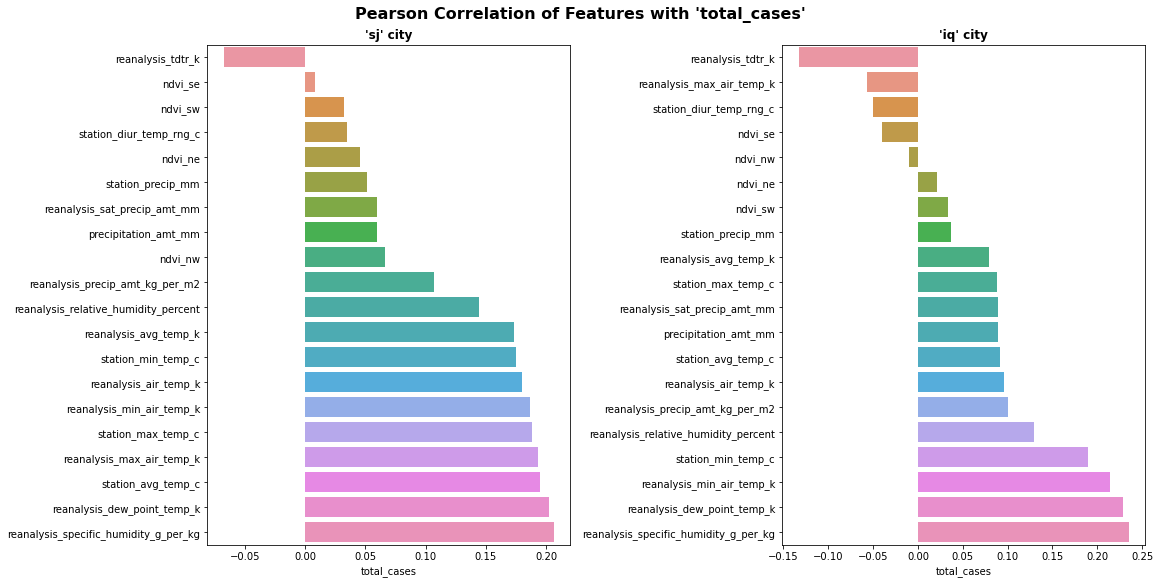

In [6]:
multiple_correlation_bar(sj_train_df, iq_train_df)

There are no strong correlation between features with the <code>total_cases</code>. However, overall temperature data seemed to be having some positive relationship with <code>total</code>

In [7]:
def multiple_line_plot(df, y_var, x1_var, x2_var, city):
    fig, ax1 = plt.subplots(figsize=(15,4))
    plt.title('Cases by week in {}'.format(city))
    ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in df.weekofyear],
                y=df[y_var], 
                alpha=.5, color='green', label='Total Cases')
    ax1.set_ylabel("Total Cases")
    ax1.set_xlabel("Week of Year")
    ax1.legend(loc=2)
    ax2 = ax1.twinx()
    ax2.plot(df.groupby('weekofyear')[x1_var].mean() - df[x1_var].mean(),
             label=x1_var, color='red')
    ax2.plot(df.groupby('weekofyear')[x2_var].min()- df[x2_var].min(),
             label=x2_var, color='blue')
    ax2.legend(loc=1)
    
    return plt.show()

<font size="4px"><b>'sj' city</b></font>

Taking the 1st positive & some other humidity features to correlated features with <code>total_cases</code>, which are <code>reanalysis_specific_humidity_g_per_kg</code> & <code>reanalysis_relative_humidity_percent</code>.


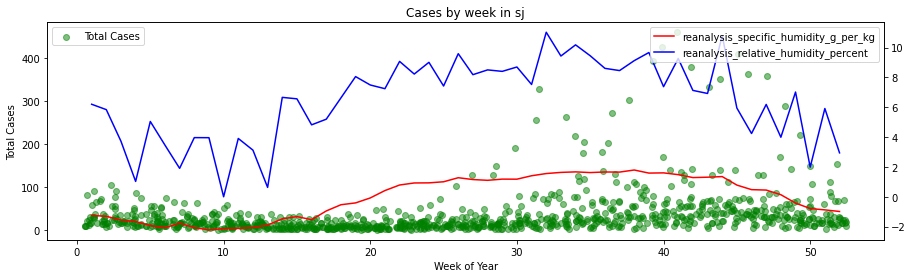

In 'sj' city, <b>humidities</b> features are showing some positive correlation implications with <code>total_cases</code>, where we can see the increase or decrease of <b>humidities</b> in align with increases in <code>total_cases</code>, or vice versa.


In [8]:
display(Markdown("""Taking the 1st positive & some other humidity features to correlated features with \
<code>total_cases</code>, which are <code>reanalysis_specific_humidity_g_per_kg</code> & \
<code>reanalysis_relative_humidity_percent</code>.
"""))

multiple_line_plot(df=sj_train_df, 
                   y_var="total_cases", 
                   x1_var="reanalysis_specific_humidity_g_per_kg",
                   x2_var="reanalysis_relative_humidity_percent",
                   city="sj")

display(Markdown("""In 'sj' city, <b>humidities</b> features are showing some positive correlation implications with \
<code>total_cases</code>, where we can see the increase or decrease of <b>humidities</b> in align with \
increases in <code>total_cases</code>, or vice versa.
"""))

Taking the 2nd & 3rd positive correlated features with <code>total_cases</code>, which are <code>reanalysis_dew_point_temp_k</code> & <code>reanalysis_min_air_temp_k</code>.


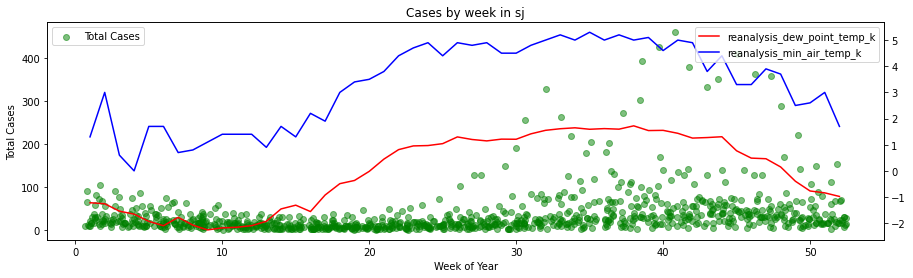

In 'sj' city, there are some slight correlation between the <b>temperature</b> with <code>total_cases</code>, where we can see at the end of the <code>weekofyear</code> when there are increases in temperatures, the <code>total_cases</code> also increases.


In [9]:
display(Markdown("""Taking the 2nd & 3rd positive correlated features with <code>total_cases</code>, which are \
<code>reanalysis_dew_point_temp_k</code> & <code>reanalysis_min_air_temp_k</code>.
"""))

multiple_line_plot(df=sj_train_df, 
                   y_var="total_cases", 
                   x1_var="reanalysis_dew_point_temp_k",
                   x2_var="reanalysis_min_air_temp_k",
                   city="sj")

display(Markdown("""In 'sj' city, there are some slight correlation between the <b>temperature</b> with \
<code>total_cases</code>, where we can see at the end of the <code>weekofyear</code> when there are \
increases in temperatures, the <code>total_cases</code> also increases.
"""))

<font size="4px"><b>'iq' city</b></font>

Taking the 1st positive & some other humidity features to correlated features with <code>total_cases</code>, which are <code>reanalysis_specific_humidity_g_per_kg</code> & <code>reanalysis_relative_humidity_percent</code>.


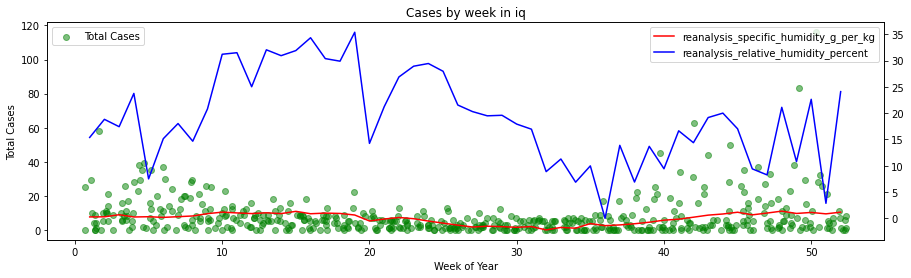

In 'iq' city, the correlation between the <b>humidity</b> with <code>total_cases</code> decreases, where the trend does not show prominent relationship as 'sj' city.


In [10]:
display(Markdown("""Taking the 1st positive & some other humidity features to correlated features with \
<code>total_cases</code>, which are <code>reanalysis_specific_humidity_g_per_kg</code> & \
<code>reanalysis_relative_humidity_percent</code>.
"""))

multiple_line_plot(df=iq_train_df, 
                   y_var="total_cases", 
                   x1_var="reanalysis_specific_humidity_g_per_kg",
                   x2_var="reanalysis_relative_humidity_percent",
                   city="iq")

display(Markdown("""In 'iq' city, the correlation between the <b>humidity</b> with \
<code>total_cases</code> decreases, where the trend does not show prominent relationship as 'sj' city.
"""))

Taking the 1st positive & some other humidity features to correlated features with <code>total_cases</code>, which are <code>reanalysis_specific_humidity_g_per_kg</code> & <code>reanalysis_relative_humidity_percent</code>.


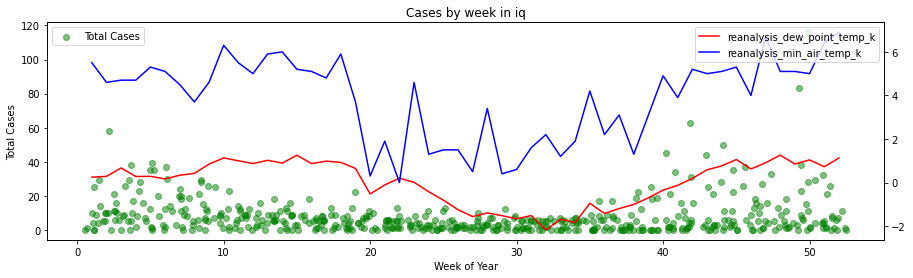

In 'iq' city, the correlation between the <b>temperature</b> with <code>total_cases</code> decreases, where the trend does not show prominent relationship as 'sj' city.


In [11]:
display(Markdown("""Taking the 1st positive & some other humidity features to correlated features with \
<code>total_cases</code>, which are <code>reanalysis_specific_humidity_g_per_kg</code> & \
<code>reanalysis_relative_humidity_percent</code>.
"""))

multiple_line_plot(df=iq_train_df, 
                   y_var="total_cases", 
                   x1_var="reanalysis_dew_point_temp_k",
                   x2_var="reanalysis_min_air_temp_k",
                   city="iq")

display(Markdown("""In 'iq' city, the correlation between the <b>temperature</b> with \
<code>total_cases</code> decreases, where the trend does not show prominent relationship as 'sj' city.
"""))

<font size="5px" face="sans-serif">From Feature Correlation Studies, we can deduce that:</font>
___
    
1. Features from present data do not show a very high feature correaltion to <code>total_cases</code>.
   
    
2. However, <b>temperature</b> and <b>humidity</b> data show higher correalation to <code>total_cases</code> compared to other features. 
    
    
3. <b>Feature Engineering</b> will be conducted focusing these importance features, <b>temperature</b> and <b>humidity</b> data.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Feature Engineering</h2>
</div>

<font size="5px" face="sans-serif"><ins>Creating Categorical Seasonal Features of <code>total_cases</code></ins></font>

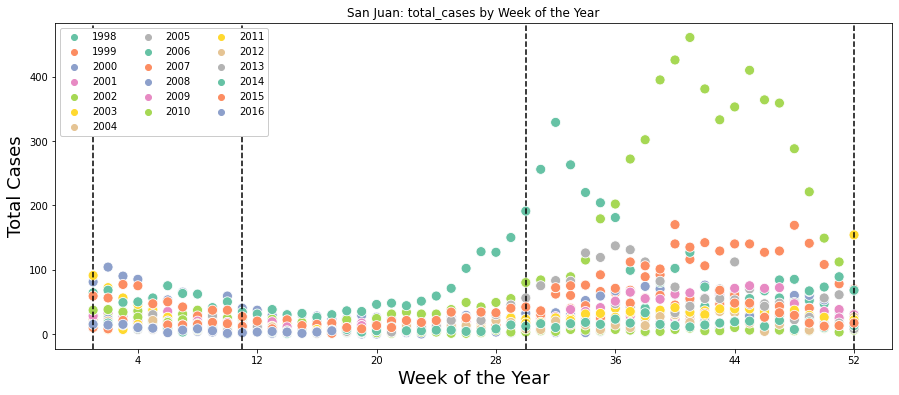

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x='weekofyear',y='total_cases', hue='year', s=100,
                data=sj_train_df, palette='Set2',legend='full')
plot_windows = [1,11,30,52]
for w in plot_windows:
    plt.axvline(w, linestyle='--',color='black')
ax.legend(loc=2, framealpha=1, ncol=3, prop={'size': 10})
ax.set_title("San Juan: total_cases by Week of the Year")
ax.set_ylabel('Total Cases', size=18)
ax.set_xlabel('Week of the Year', size=18)
ax.set_xticks([4,12,20,28,36,44,52], size=16)
plt.show()

In [13]:
cutoffs = [11,30]
sj_train_df['low_season'] = np.where((sj_train_df.weekofyear<cutoffs[0]), 1, 0)
sj_train_df['rampup_season'] = np.where((sj_train_df.weekofyear>=cutoffs[0]) &
                                        (sj_train_df.weekofyear<cutoffs[1]), 1, 0)
sj_train_df['high_season'] = np.where((sj_train_df.weekofyear>=cutoffs[1]), 1, 0)

iq_train_df['low_season'] = np.where((iq_train_df.weekofyear<cutoffs[0]), 1, 0)
iq_train_df['rampup_season'] = np.where((iq_train_df.weekofyear>=cutoffs[0]) &
                                        (iq_train_df.weekofyear<cutoffs[1]), 1, 0)
iq_train_df['high_season'] = np.where((iq_train_df.weekofyear>=cutoffs[1]), 1, 0)

<font size="5px" face="sans-serif"><ins>Create Lagging Features</ins></font>

In [14]:
def lags_comparison_plot(df, y_var, x1_var, x2_var, x3_var, x4_var, city):
    fig, ax1 = plt.subplots(figsize=(15,4))
    plt.title('Cases by week in {}'.format(city))
    ax1.scatter(x=[x+np.random.uniform(-.5,.5) for x in df.weekofyear],
                y=df[y_var], 
                alpha=.5, color='green', label='Total Cases')
    ax1.set_ylabel("Total Cases")
    ax1.set_xlabel("Week of Year")
    ax1.legend(loc=2)
    ax2 = ax1.twinx()
    ax2.plot(df.groupby('weekofyear')[x1_var].mean() - df[x1_var].mean(),
             label=x1_var, color='black', linewidth=2)
    ax2.plot(df.groupby('weekofyear')[x2_var].mean()- df[x2_var].mean(),
             label=x2_var, color='blue', linewidth=0.8)
    ax2.plot(df.groupby('weekofyear')[x3_var].mean()- df[x3_var].mean(),
             label=x3_var, color='black', linewidth=0.8)
    ax2.plot(df.groupby('weekofyear')[x4_var].mean()- df[x4_var].mean(),
             label=x4_var, color='yellow', linewidth=0.8)
    ax2.legend(loc=1)
    
    return plt.show()

In [15]:
to_shift = ["reanalysis_specific_humidity_g_per_kg", "reanalysis_dew_point_temp_k", "reanalysis_min_air_temp_k",
            "reanalysis_max_air_temp_k", "station_min_temp_c", "station_max_temp_c",
            "reanalysis_air_temp_k", "reanalysis_relative_humidity_percent"]
    
for i in to_shift:
    sj_train_df[i+"_1lag"] = sj_train_df[i].shift(-1)
    sj_train_df[i+"_2lag"] = sj_train_df[i].shift(-2)
    sj_train_df[i+"_3lag"] = sj_train_df[i].shift(-3)
sj_train_df = sj_train_df.fillna(method="ffill")

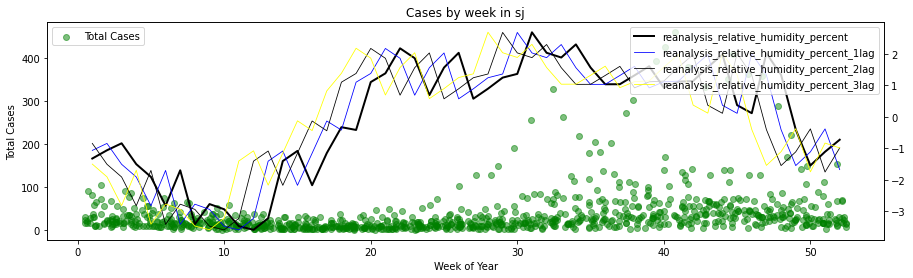

In [16]:
lags_comparison_plot(df=sj_train_df, 
                     y_var="total_cases", 
                     x1_var="reanalysis_relative_humidity_percent", 
                     x2_var="reanalysis_relative_humidity_percent_1lag", 
                     x3_var="reanalysis_relative_humidity_percent_2lag", 
                     x4_var="reanalysis_relative_humidity_percent_3lag", 
                     city="sj")

In [17]:
to_shift = ["reanalysis_specific_humidity_g_per_kg", "reanalysis_dew_point_temp_k", "reanalysis_min_air_temp_k",
            "reanalysis_max_air_temp_k", "station_min_temp_c", "station_max_temp_c",
            "reanalysis_air_temp_k", "reanalysis_relative_humidity_percent"]
    
for i in to_shift:
    iq_train_df[i+"_1lag"] = iq_train_df[i].shift(-1)
    iq_train_df[i+"_2lag"] = iq_train_df[i].shift(-2)
    iq_train_df[i+"_3lag"] = iq_train_df[i].shift(-3)
iq_train_df = iq_train_df.fillna(method="ffill")

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Training Regression Model on <code>total_cases</code></h2>
</div>

<img src="img/model_workflow.png" alt="agenda" height="400" width="800">

<font size="5px" face="sans-serif">Workflow of modelling will be conducted as shown in the image above:</font>
1. Data will be split into <b>train</b> and <b>test</b> dataset.

2. 4 different models are built to predict <code>total_cases</code>. which are <b>Linear Regression</b>, <b>Random Forest</b>, <b>XGBOOST</b> and <b>Gradient Boosting</b>.

3. 3 metrics which are <b>MAE</b>, <b>R2 Score</b> and <b>RMSE</b>, where <b>MAE</b> will be used as the main metrics to evaluate the model.

4. Finally, we will understand the feature importances from the model and see how the each features affect the prediction using SHAP.

In [21]:
TRAIN_COLS = ['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
              'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
              'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
              'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
              'reanalysis_precip_amt_kg_per_m2',
              'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
              'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
              'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
              'station_min_temp_c', 'station_precip_mm']

FEATURE_ENGINEER_COLS = ['low_season', 'rampup_season', 'high_season',
                         'reanalysis_specific_humidity_g_per_kg_1lag',
                         'reanalysis_specific_humidity_g_per_kg_2lag',
                         'reanalysis_specific_humidity_g_per_kg_3lag',
                         'reanalysis_dew_point_temp_k_1lag', 'reanalysis_dew_point_temp_k_2lag',
                         'reanalysis_dew_point_temp_k_3lag', 'reanalysis_min_air_temp_k_1lag',
                         'reanalysis_min_air_temp_k_2lag', 'reanalysis_min_air_temp_k_3lag',
                         'reanalysis_max_air_temp_k_1lag', 'reanalysis_max_air_temp_k_2lag',
                         'reanalysis_max_air_temp_k_3lag', 'station_min_temp_c_1lag',
                         'station_min_temp_c_2lag', 'station_min_temp_c_3lag',
                         'station_max_temp_c_1lag', 'station_max_temp_c_2lag',
                         'station_max_temp_c_3lag', 'reanalysis_air_temp_k_1lag',
                         'reanalysis_air_temp_k_2lag', 'reanalysis_air_temp_k_3lag',
                         'reanalysis_relative_humidity_percent_1lag',
                         'reanalysis_relative_humidity_percent_2lag',
                         'reanalysis_relative_humidity_percent_3lag']


REGRESSION_MODELS = dict(
    LINEAR = dict(alg=LinearRegression()),
    RFR = dict(alg=RandomForestRegressor(), args=dict(randome_state=42, scaled=False),
               param_grid={
                    "max_depth"         : [None, 5, 10, 20, 35],
                    "max_features"      : [2, 5, "auto"],
                    # "min_samples_leaf"  : [2, 3, 4, 10],
                    "n_estimators"      : [20, 50, 100, 200],
                }),
    XGBOOST = dict(alg=XGBRegressor(), args=dict(random_state=42, scaled=False),
                   param_grid={
                       "learning_rate":[0.01, 0.05, 0.1, 0.3],
                       "max_depth": [2, 3, 6, 10], # 3
                       "n_estimators": [20, 50, 200], # 100
                   }),
    GRADIENT = dict(alg=GradientBoostingRegressor(), args=dict(random_state=42),
                    param_grid={
                        "n_estimators": [100, 150, 200, 400],
                        "learning_rate": [0.03, 0.1, 0.3],
                        'max_depth': [2, 4, 5, 6, 8],
                    }),
    BAGGING = dict(alg=BaggingClassifier(), args=dict(random_state=42),
                    param_grid={
                        "n_estimators": [10, 30, 50, 100],
                        "max_features": [1, 5, 20, 100],
                        'max_samples': [1, 5, 20, 100],
                    }),
)

TUNING_METHOD = "random_search"

In [22]:
def split_data(df, input_cols=[], target="total_cases", ratio=0.30):
    X = df[input_cols]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    
    return X_train, X_test, y_train, y_test

def mean_absolute_percentage_error(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    
    return mape


def root_mean_square_error(actual, pred):
    rmse = math.sqrt(mean_absolute_error(actual, pred))
    
    return rmse


def evaluate(actual, pred):
    R2 = r2_score(actual, pred)
    MAE = mean_absolute_error(actual, pred)
    RMSE = root_mean_square_error(actual, pred)
    
    metrics = dict(MAE=MAE, RMSE=RMSE, R2_Score=R2)
    
    return metrics


def run(x_train, x_test, y_train, y_test, model_name, tuning_method):
    if model_name == "LINEAR":
        model_type = REGRESSION_MODELS["LINEAR"]
        alg = model_type["alg"]
    elif model_name == "RFR":
        model_type = REGRESSION_MODELS["RFR"]
        alg = model_type["alg"]
    elif model_name == "XGBOOST":
        model_type = REGRESSION_MODELS["XGBOOST"]
        alg = model_type["alg"]
    elif model_name == "GRADIENT":
        model_type = REGRESSION_MODELS["GRADIENT"]
        alg = model_type["alg"]
    elif model_name == "BAGGING":
        model_type = REGRESSION_MODELS["BAGGING"]
        alg = model_type["alg"]
        
    if tuning_method == None:
        model = alg
    elif tuning_method == "grid_search":
        alg_tuned = GridSearchCV(estimator=alg,
                                 param_grid=model_type["param_grid"],
                                 cv=5,
                                 verbose=0)
    elif tuning_method == "random_search":
        alg_tuned = RandomizedSearchCV(estimator=alg,
                                       param_distributions=model_type["param_grid"],
                                       cv=5,
                                       verbose=0)

    if tuning_method == None:
        model.fit(x_train, y_train)
    else:
        alg_tuned.fit(x_train, y_train)
        model = alg.set_params(**alg_tuned.best_params_)
        model.fit(x_train, y_train)

    predict = model.predict(x_test)
    predict_series = pd.Series(predict, index=y_test.index)
    metrics = evaluate(y_test, predict)
    metrics["MODEL"] = model_name
    
    return model, predict, predict_series, metrics


def metrics_comparison(sj_metrics, iq_metrics, metrics_var):
    fig = plt.figure(figsize=(15, 6), constrained_layout=True)
    spec = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)
    
    ax0 = fig.add_subplot(spec[0, 0])
    labels = sj_metrics["MODEL"]
    y_pos = np.arange(len(labels))
    ax0.barh(y_pos, sj_metrics[metrics_var], align="center")
    ax0.set_yticks(y_pos, labels=labels)
    ax0.invert_yaxis()
    ax0.set_xlabel("MAE Errors", fontsize=12)
    ax0.set_xlabel("Models", fontsize=12)
    ax0.tick_params(axis='x', which='minor', labelsize=12)
    ax0.tick_params(axis='y', which='minor', labelsize=12)
    ax0.set_title("Models Performance in 'sj' city", weight="bold", fontsize=14)
    for i, v in enumerate(sj_metrics[metrics_var]):
        ax0.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")
    
    ax1 = fig.add_subplot(spec[0, 1])
    labels = iq_metrics["MODEL"]
    y_pos = np.arange(len(labels))
    ax1.barh(y_pos, iq_metrics[metrics_var], align="center")
    ax1.set_yticks(y_pos, labels=labels)
    ax1.invert_yaxis()
    ax1.set_xlabel("MAE Errors", fontsize=12)
    ax1.set_xlabel("Models", fontsize=12)
    ax1.tick_params(axis='x', which='minor', labelsize=12)
    ax1.tick_params(axis='y', which='minor', labelsize=12)
    ax1.set_title("Models Performance in 'iq' city", weight="bold", fontsize=14)
    for i, v in enumerate(iq_metrics[metrics_var]):
        ax1.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")
    
    fig.suptitle("MAE Comparison Between 2 Cities on Prediction total_cases", fontsize=16, fontweight="bold")
    
    return plt.show()


def actual_vs_pred_line_plot(actual, predict, title=None):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(actual, linewidth=2, label='Test Data', color='lightblue')
    ax.plot(predict, linewidth=1, label='Predict Data', color="black", linestyle="-")
    ax.legend(loc=1, framealpha=1, prop={'size': 15})
    
    if title == None:
        ax.set_title("Actual vs Predict Dengue Total Cases", weight="bold", fontsize=14)
    else:
        ax.set_title(title, weight="bold", fontsize=14)
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Cases of Dengue Cases")
    
    return plt.show()

<img src="img/model_comparison.png" alt="agenda" height="400" width="800">

1. There are 3 different cases in testing the model:
    - <b>Base Case</b>
    - <b>Feature Engineering</b>
    - <b>Base Case + Feature Selection</b>

<font size="5px" face="sans-serif"><ins>1st Case: Base Model using Original Features</ins></font>

In [23]:
sj_X_train, sj_X_test, sj_y_train, sj_y_test = split_data(sj_train_df, input_cols=TRAIN_COLS, target="total_cases", ratio=0.20)

iq_X_train, iq_X_test, iq_y_train, iq_y_test = split_data(iq_train_df, input_cols=TRAIN_COLS, target="total_cases", ratio=0.20)

<font size="4px"><b>'sj' city</b></font>

In [25]:
%%time
base_sj_predict_df = pd.DataFrame()
base_sj_metrics_list = []
base_sj_model = []

for model_name in REGRESSION_MODELS:
    print(model_name)
    if model_name == "LINEAR":
        model, predict, predict_series, metrics = run(sj_X_train, sj_X_test, sj_y_train, sj_y_test, model_name, tuning_method=None)
    else:
        model, predict, predict_series, metrics = run(sj_X_train, sj_X_test, sj_y_train, sj_y_test, model_name, tuning_method=TUNING_METHOD)
        
    base_sj_predict_df[f"{model_name}_total_cases"] = predict
    base_sj_metrics_list.append(metrics)
    base_sj_model.append(model)
    
base_sj_predict_df.index = predict_series.index
base_sj_predict_df["y_test"] = sj_y_test
base_sj_predict_df.reset_index(inplace=True)
base_sj_metrics_df = pd.DataFrame(base_sj_metrics_list)
base_sj_model = pd.DataFrame(base_sj_model).rename(columns={0: "Algorithm"})

LINEAR
RFR
XGBOOST
GRADIENT
BAGGING
Wall time: 1min 32s


In [26]:
base_sj_metrics_df

,MAE,RMSE,R2_Score,MODEL
0,24.9124,4.9912,0.1784,LINEAR
1,14.5099,3.8092,0.7066,RFR
2,12.6323,3.5542,0.7407,XGBOOST
3,13.4502,3.6675,0.7628,GRADIENT
4,26.4415,5.1421,-0.2057,BAGGING


<font size="4px"><b>'iq' city</b></font>

In [27]:
%%time
base_iq_predict_df = pd.DataFrame()
base_iq_metrics_list = []
base_iq_model = []

for model_name in REGRESSION_MODELS:
    print(model_name)
    if model_name == "LINEAR":
        model, predict, predict_series, metrics = run(iq_X_train, iq_X_test, iq_y_train, iq_y_test, model_name, tuning_method=None)
    else:
        model, predict, predict_series, metrics = run(iq_X_train, iq_X_test, iq_y_train, iq_y_test, model_name, tuning_method=TUNING_METHOD)
        
    base_iq_predict_df[f"{model_name}_total_cases"] = predict
    base_iq_metrics_list.append(metrics)
    base_iq_model.append(model)
    
base_iq_predict_df.index = predict_series.index
base_iq_predict_df["y_test"] = iq_y_test
base_iq_predict_df.reset_index(inplace=True)
base_iq_metrics_df = pd.DataFrame(base_iq_metrics_list)
base_iq_model = pd.DataFrame(base_iq_model).rename(columns={0: "Algorithm"})

LINEAR
RFR
XGBOOST
GRADIENT
BAGGING
Wall time: 1min 14s


In [28]:
base_iq_metrics_df

,MAE,RMSE,R2_Score,MODEL
0,6.6483,2.5784,-0.0061,LINEAR
1,5.3221,2.3070,0.2603,RFR
2,5.0658,2.2507,0.2393,XGBOOST
3,5.1961,2.2795,0.1178,GRADIENT
4,5.3558,2.3143,-0.1454,BAGGING


<font size="5px" face="sans-serif"><ins>2nd Case: With Feature Engineering</ins></font>

In [29]:
sj_X_train, sj_X_test, sj_y_train, sj_y_test = split_data(sj_train_df, 
                                                          input_cols=TRAIN_COLS + FEATURE_ENGINEER_COLS, 
                                                          target="total_cases", 
                                                          ratio=0.20)

iq_X_train, iq_X_test, iq_y_train, iq_y_test = split_data(iq_train_df, 
                                                          input_cols=TRAIN_COLS + FEATURE_ENGINEER_COLS, 
                                                          target="total_cases", 
                                                          ratio=0.20)

<font size="4px"><b>'sj' city</b></font>

In [30]:
%%time
fe_sj_predict_df = pd.DataFrame()
fe_sj_metrics_list = []
fe_sj_model = []

for model_name in REGRESSION_MODELS:
    print(model_name)
    if model_name == "LINEAR":
        model, predict, predict_series, metrics = run(sj_X_train, sj_X_test, sj_y_train, sj_y_test, model_name, tuning_method=None)
    else:
        model, predict, predict_series, metrics = run(sj_X_train, sj_X_test, sj_y_train, sj_y_test, model_name, tuning_method=TUNING_METHOD)
        
    fe_sj_predict_df[f"{model_name}_total_cases"] = predict
    fe_sj_metrics_list.append(metrics)
    fe_sj_model.append(model)
    
fe_sj_predict_df.index = predict_series.index
fe_sj_predict_df["y_test"] = sj_y_test
fe_sj_predict_df.reset_index(inplace=True)
fe_sj_metrics_df = pd.DataFrame(fe_sj_metrics_list)
fe_sj_model = pd.DataFrame(fe_sj_model).rename(columns={0: "Algorithm"})

LINEAR
RFR
XGBOOST
GRADIENT
BAGGING
Wall time: 2min 54s


In [31]:
fe_sj_metrics_df

,MAE,RMSE,R2_Score,MODEL
0,25.4252,5.0423,0.2366,LINEAR
1,16.0388,4.0048,0.6730,RFR
2,13.8199,3.7175,0.7159,XGBOOST
3,13.2014,3.6334,0.8001,GRADIENT
4,26.2181,5.1204,-0.1898,BAGGING


<font size="4px"><b>'iq' city</b></font>

In [32]:
%%time
fe_iq_predict_df = pd.DataFrame()
fe_iq_metrics_list = []
fe_iq_model = []

for model_name in REGRESSION_MODELS:
    print(model_name)
    if model_name == "LINEAR":
        model, predict, predict_series, metrics = run(iq_X_train, iq_X_test, iq_y_train, iq_y_test, model_name, tuning_method=None)
    else:
        model, predict, predict_series, metrics = run(iq_X_train, iq_X_test, iq_y_train, iq_y_test, model_name, tuning_method=TUNING_METHOD)
        
    fe_iq_predict_df[f"{model_name}_total_cases"] = predict
    fe_iq_metrics_list.append(metrics)
    fe_iq_model.append(model)
    
fe_iq_predict_df.index = predict_series.index
fe_iq_predict_df["y_test"] = iq_y_test
fe_iq_predict_df.reset_index(inplace=True)
fe_iq_metrics_df = pd.DataFrame(fe_iq_metrics_list)
fe_iq_model = pd.DataFrame(fe_iq_model).rename(columns={0: "Algorithm"})

LINEAR
RFR
XGBOOST
GRADIENT
BAGGING
Wall time: 1min 24s


In [33]:
fe_iq_metrics_df

,MAE,RMSE,R2_Score,MODEL
0,6.6473,2.5782,0.0081,LINEAR
1,6.3805,2.5260,0.0785,RFR
2,5.1773,2.2754,0.0797,XGBOOST
3,5.4498,2.3345,0.1273,GRADIENT
4,5.6923,2.3859,-0.1172,BAGGING


<font size="5px" face="sans-serif"><ins>3rd Case: Original with Feature Selection</ins></font>

In [34]:
FEATURE_SELECTION_cOLUMNS = ["RF", "Extratrees", "Kbest"]

In [35]:
def random_forest_selection( x, y):
    alg = RandomForestRegressor()
    alg.fit(x, y)
    preds = alg.predict(x)
    accuracy = r2_score(preds, y)

    rf_fi = pd.DataFrame(alg.feature_importances_, columns=["RF"], index=x.columns)
    rf_fi = rf_fi.reset_index().sort_values(['RF'],ascending=0)
    
    return rf_fi


def extratrees_selection(x, y):
    alg = ExtraTreesRegressor()
    alg.fit(x, y)

    extratrees_fi = pd.DataFrame(alg.feature_importances_, columns=["Extratrees"], index=x.columns)
    extratrees_fi = extratrees_fi.reset_index().sort_values(['Extratrees'],ascending=0)
    
    return extratrees_fi


def kbest_selection(x, y):
    model = SelectKBest(score_func=chi2, k=5)
    alg = model.fit(x.abs(), y)

    pd.options.display.float_format = '{:.2f}'.format
    kbest_fi = pd.DataFrame(alg.scores_, columns=["Kbest"], index=x.columns)
    kbest_fi = kbest_fi.reset_index().sort_values('Kbest',ascending=0)
    
    return kbest_fi


def feature_selection_scores(x, y):
    try:
        print("- feature selection through Random Forest Regressor...")
        rf_fi = random_forest_selection(x, y)
    except MemoryError:
        print("- feature selection through Random Forest Regressor not run due to laptop memory issue...")

    print("- feature selection through Extratrees Regressor...")
    extratrees_fi = extratrees_selection(x, y)

    print("- feature selection through K-Best...")
    kbest_fi = kbest_selection(x, y)

    print("Creating feature selection table to acquire the right features")
    dfs = [rf_fi, extratrees_fi, kbest_fi]
    features_final_results = reduce(lambda left,right: pd.merge(left, right, on='index'), dfs)

    score_table = pd.DataFrame({},[])
    score_table['index'] = features_final_results['index']
    for i in FEATURE_SELECTION_cOLUMNS:
        score_table[i] = features_final_results['index'].isin(list(features_final_results.nlargest(5,i)['index'])).astype(int)
    score_table['final_score'] = score_table[FEATURE_SELECTION_cOLUMNS].sum(axis=1)
    score_table = score_table.sort_values('final_score',ascending=0)
    top_20_features = score_table.iloc[:20, ]["index"].values
    score_table = score_table.reset_index(drop=True)

    return top_20_features , score_table

In [36]:
print("'sj' city")
sj_top_20_features, sj_score_table = feature_selection_scores(sj_X_train, sj_y_train)
display(sj_score_table.head(10))

print()
print("'iq' city")
iq_top_20_features, iq_score_table = feature_selection_scores(iq_X_train, iq_y_train)
display(iq_score_table.head(10))

'sj' city
- feature selection through Random Forest Regressor...
- feature selection through Extratrees Regressor...
- feature selection through K-Best...
Creating feature selection table to acquire the right features


,index,RF,Extratrees,Kbest,final_score
0,year,1,1,0,2
1,station_max_temp_c,1,1,0,2
2,weekofyear,1,0,1,2
3,reanalysis_dew_point_temp_k,0,1,0,1
4,station_precip_mm,0,0,1,1
5,precipitation_amt_mm,0,0,1,1
6,ndvi_sw,0,1,0,1
7,reanalysis_sat_precip_amt_mm,0,0,1,1
8,reanalysis_precip_amt_kg_per_m2,0,0,1,1
9,reanalysis_dew_point_temp_k_1lag,1,0,0,1



'iq' city
- feature selection through Random Forest Regressor...
- feature selection through Extratrees Regressor...
- feature selection through K-Best...
Creating feature selection table to acquire the right features


,index,RF,Extratrees,Kbest,final_score
0,year,1,1,0,2
1,station_avg_temp_c,1,1,0,2
2,weekofyear,1,0,1,2
3,precipitation_amt_mm,0,0,1,1
4,reanalysis_precip_amt_kg_per_m2,0,0,1,1
5,reanalysis_sat_precip_amt_mm,0,0,1,1
6,rampup_season,0,1,0,1
7,reanalysis_specific_humidity_g_per_kg_3lag,0,1,0,1
8,reanalysis_specific_humidity_g_per_kg_2lag,0,1,0,1
9,reanalysis_dew_point_temp_k_2lag,1,0,0,1


In [37]:
display(Markdown("""<font size="5px" face="sans-serif">Preparing Feature Selection Dataset</font>"""))

sj_train_df = train_df.loc[train_df["city"]=="sj"]
cutoffs = [11,30]
sj_train_df['low_season'] = np.where((sj_train_df.weekofyear<cutoffs[0]), 1, 0)
sj_train_df['rampup_season'] = np.where((sj_train_df.weekofyear>=cutoffs[0]) &
                                        (sj_train_df.weekofyear<cutoffs[1]), 1, 0)
sj_train_df['high_season'] = np.where((sj_train_df.weekofyear>=cutoffs[1]), 1, 0)
for i in to_shift:
    sj_train_df[i+"_1lag"] = sj_train_df[i].shift(-1)
    sj_train_df[i+"_2lag"] = sj_train_df[i].shift(-2)
    sj_train_df[i+"_3lag"] = sj_train_df[i].shift(-3)
sj_train_df = sj_train_df.fillna(method="ffill")
sj_train_df = sj_train_df[np.append(sj_top_20_features, ["total_cases"])]

iq_train_df = train_df.loc[train_df["city"]=="iq"]
iq_train_df['low_season'] = np.where((iq_train_df.weekofyear<cutoffs[0]), 1, 0)
iq_train_df['rampup_season'] = np.where((iq_train_df.weekofyear>=cutoffs[0]) &
                                        (iq_train_df.weekofyear<cutoffs[1]), 1, 0)
iq_train_df['high_season'] = np.where((iq_train_df.weekofyear>=cutoffs[1]), 1, 0)
for i in to_shift:
    iq_train_df[i+"_1lag"] = iq_train_df[i].shift(-1)
    iq_train_df[i+"_2lag"] = iq_train_df[i].shift(-2)
    iq_train_df[i+"_3lag"] = iq_train_df[i].shift(-3)
iq_train_df = iq_train_df.fillna(method="ffill")
iq_train_df = iq_train_df[np.append(iq_top_20_features, ["total_cases"])]

<font size="5px" face="sans-serif">Preparing Feature Selection Dataset</font>

In [38]:
sj_X_train, sj_X_test, sj_y_train, sj_y_test = split_data(sj_train_df, input_cols=sj_top_20_features, target="total_cases", ratio=0.20)

iq_X_train, iq_X_test, iq_y_train, iq_y_test = split_data(iq_train_df, input_cols=iq_top_20_features, target="total_cases", ratio=0.20)

In [39]:
%%time
fs_sj_predict_df = pd.DataFrame()
fs_sj_metrics_list = []
fs_sj_model = []

for model_name in REGRESSION_MODELS:
    print(model_name)
    if model_name == "LINEAR":
        model, predict, predict_series, metrics = run(sj_X_train, sj_X_test, sj_y_train, sj_y_test, model_name, tuning_method=None)
    else:
        model, predict, predict_series, metrics = run(sj_X_train, sj_X_test, sj_y_train, sj_y_test, model_name, tuning_method=TUNING_METHOD)
        
    fs_sj_predict_df[f"{model_name}_total_cases"] = predict
    fs_sj_metrics_list.append(metrics)
    fs_sj_model.append(model)
    
fs_sj_predict_df.index = predict_series.index
fs_sj_predict_df["y_test"] = sj_y_test
fs_sj_predict_df.reset_index(inplace=True)
fs_sj_metrics_df = pd.DataFrame(fe_sj_metrics_list)
fs_sj_model = pd.DataFrame(fe_sj_model).rename(columns={0: "Algorithm"})

LINEAR
RFR
XGBOOST
GRADIENT
BAGGING
Wall time: 1min 12s


In [40]:
fs_sj_metrics_df

,MAE,RMSE,R2_Score,MODEL
0,25.43,5.04,0.24,LINEAR
1,16.04,4.00,0.67,RFR
2,13.82,3.72,0.72,XGBOOST
3,13.20,3.63,0.80,GRADIENT
4,26.22,5.12,-0.19,BAGGING


In [41]:
%%time
fs_iq_predict_df = pd.DataFrame()
fs_iq_metrics_list = []
fs_iq_model = []

for model_name in REGRESSION_MODELS:
    print(model_name)
    if model_name == "LINEAR":
        model, predict, predict_series, metrics = run(iq_X_train, iq_X_test, iq_y_train, iq_y_test, model_name, tuning_method=None)
    else:
        model, predict, predict_series, metrics = run(iq_X_train, iq_X_test, iq_y_train, iq_y_test, model_name, tuning_method=TUNING_METHOD)
        
    fs_iq_predict_df[f"{model_name}_total_cases"] = predict
    fs_iq_metrics_list.append(metrics)
    fs_iq_model.append(model)
    
fs_iq_predict_df.index = predict_series.index
fs_iq_predict_df["y_test"] = iq_y_test
fs_iq_predict_df.reset_index(inplace=True)
fs_iq_metrics_df = pd.DataFrame(fs_iq_metrics_list)
fs_iq_model = pd.DataFrame(fs_iq_model).rename(columns={0: "Algorithm"})

LINEAR
RFR
XGBOOST
GRADIENT
BAGGING
Wall time: 42.1 s


In [42]:
fs_iq_metrics_df

,MAE,RMSE,R2_Score,MODEL
0,6.74,2.60,0.02,LINEAR
1,6.18,2.49,0.09,RFR
2,5.32,2.31,0.12,XGBOOST
3,5.69,2.39,0.05,GRADIENT
4,5.37,2.32,-0.13,BAGGING


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Results Analysis</ins></h2>
</div>

<img src="img/model_evaluation.png" alt="agenda" height="400" width="800">

In [43]:
def feature_importance_plot(df, sj_model, iq_model):
    sj_feature_importance = pd.Series(sj_model.feature_importances_, df.columns)
    sj_feature_importance = pd.DataFrame(sj_feature_importance).reset_index().rename(columns={"index":"features", 0:"importance"})
    sj_feature_importance = sj_feature_importance.sort_values("importance", ascending=False)
    
    iq_feature_importance = pd.Series(iq_model.feature_importances_, df.columns)
    iq_feature_importance = pd.DataFrame(iq_feature_importance).reset_index().rename(columns={"index":"features", 0:"importance"})
    iq_feature_importance = iq_feature_importance.sort_values("importance", ascending=False)
    
    fig = plt.figure(figsize=(16, 10), constrained_layout=True)
    spec = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)
    
    ax0 = fig.add_subplot(spec[0, 0])
    sns.barplot(x="importance", y="features", data=sj_feature_importance, ax=ax0)
    ax0.set_title("Feature Importance on Predicting 'sj' City total_cases")
    
    ax1 = fig.add_subplot(spec[0, 1])
    sns.barplot(x="importance", y="features", data=iq_feature_importance, ax=ax1)
    ax1.set_title("Feature Importance on Predicting 'iq' City total_cases")
    
    fig.suptitle("Feature Importance Comparison Between City 'sj' & 'iq'", fontsize=16, fontweight="bold")

    return plt.show()

<font size="4px"><b>'sj' city</b></font>

Text(0.5, 0.98, "'sj' City Model Evaluation on Base, Feature Engineering & Feature Selection")

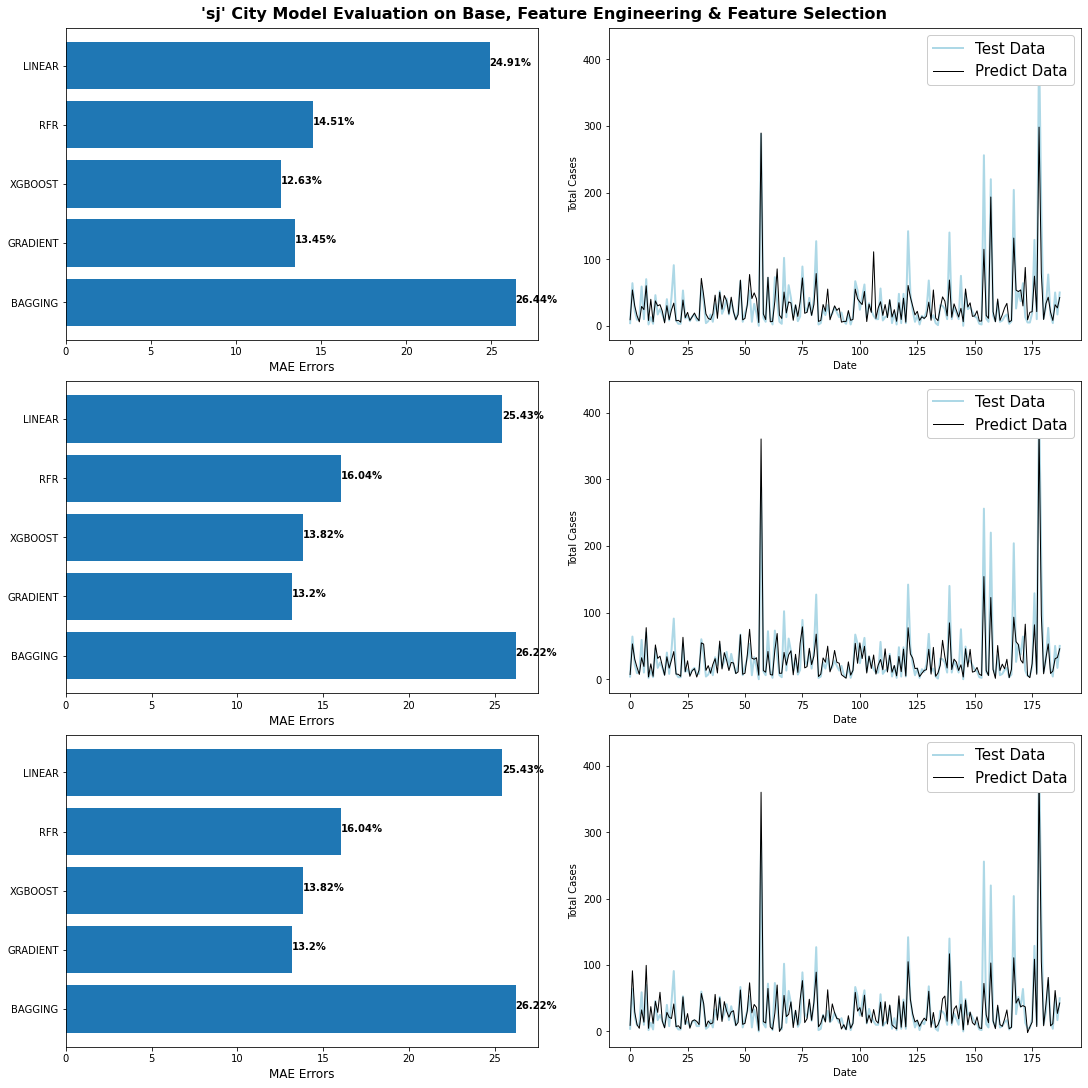

In [44]:
metrics_var = "MAE"

fig = plt.figure(figsize=(15, 15), constrained_layout=True)
spec = gridspec.GridSpec(nrows=3, ncols=2, figure=fig)

# # Base
ax0 = fig.add_subplot(spec[0, 0])
labels = base_sj_metrics_df["MODEL"]
y_pos = np.arange(len(labels))
ax0.barh(y_pos, base_sj_metrics_df[metrics_var], align="center")
ax0.set_yticks(y_pos, labels=labels)
ax0.invert_yaxis()
ax0.set_xlabel("MAE Errors", fontsize=12)
ax0.tick_params(axis='x', which='minor', labelsize=12)
ax0.tick_params(axis='y', which='minor', labelsize=12)
for i, v in enumerate(base_sj_metrics_df[metrics_var]):
    ax0.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")

ax1 = fig.add_subplot(spec[0, 1])
ax1.plot(base_sj_predict_df["y_test"], linewidth=2, label='Test Data', color='lightblue')
ax1.plot(base_sj_predict_df["GRADIENT_total_cases"], linewidth=1, label='Predict Data', color="black", linestyle="-")
ax1.legend(loc=1, framealpha=1, prop={'size': 15})
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Cases")

# # With Feature Engineering
ax2 = fig.add_subplot(spec[1, 0])
labels = fe_sj_metrics_df["MODEL"]
y_pos = np.arange(len(labels))
ax2.barh(y_pos, fe_sj_metrics_df[metrics_var], align="center")
ax2.set_yticks(y_pos, labels=labels)
ax2.invert_yaxis()
ax2.set_xlabel("MAE Errors", fontsize=12)
ax2.tick_params(axis='x', which='minor', labelsize=12)
ax2.tick_params(axis='y', which='minor', labelsize=12)
for i, v in enumerate(fe_sj_metrics_df[metrics_var]):
    ax2.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")

ax3 = fig.add_subplot(spec[1, 1])
ax3.plot(fe_sj_predict_df["y_test"], linewidth=2, label='Test Data', color='lightblue')
ax3.plot(fe_sj_predict_df["GRADIENT_total_cases"], linewidth=1, label='Predict Data', color="black", linestyle="-")
ax3.legend(loc=1, framealpha=1, prop={'size': 15})
ax3.set_xlabel("Date")
ax3.set_ylabel("Total Cases")

# # Base + Feature Selection
ax4 = fig.add_subplot(spec[2, 0])
labels = fs_sj_metrics_df["MODEL"]
y_pos = np.arange(len(labels))
ax4.barh(y_pos, fs_sj_metrics_df[metrics_var], align="center")
ax4.set_yticks(y_pos, labels=labels)
ax4.invert_yaxis()
ax4.set_xlabel("MAE Errors", fontsize=12)
ax4.tick_params(axis='x', which='minor', labelsize=12)
ax4.tick_params(axis='y', which='minor', labelsize=12)
for i, v in enumerate(fs_sj_metrics_df[metrics_var]):
    ax4.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")

ax5 = fig.add_subplot(spec[2, 1])
ax5.plot(fs_sj_predict_df["y_test"], linewidth=2, label='Test Data', color='lightblue')
ax5.plot(fs_sj_predict_df["GRADIENT_total_cases"], linewidth=1, label='Predict Data', color="black", linestyle="-")
ax5.legend(loc=1, framealpha=1, prop={'size': 15})
ax5.set_xlabel("Date")
ax5.set_ylabel("Total Cases")

fig.suptitle("'sj' City Model Evaluation on Base, Feature Engineering & Feature Selection", fontsize=16, fontweight="bold")

<font size="3px">Understand the resuly of modelling, we can see that with <b>feature engineering</b> and <b>feature selection</b>, the results does improve in <b>'sj'</b> city, with lower <code>MAE</code>. However, consireding into the computation time, we will use <b>feature selection</b> model as the final one because it create better result than <b>base</b> and also <b>feature engineering.</b></font>

<font size="3px">Further feature importance will be analyzed below with <code>iq</code> city.</font>

<font size="4px"><b>'iq' city</b></font>

Text(0.5, 0.98, "'iq' City Model Evaluation on Base, Feature Engineering & Feature Selection")

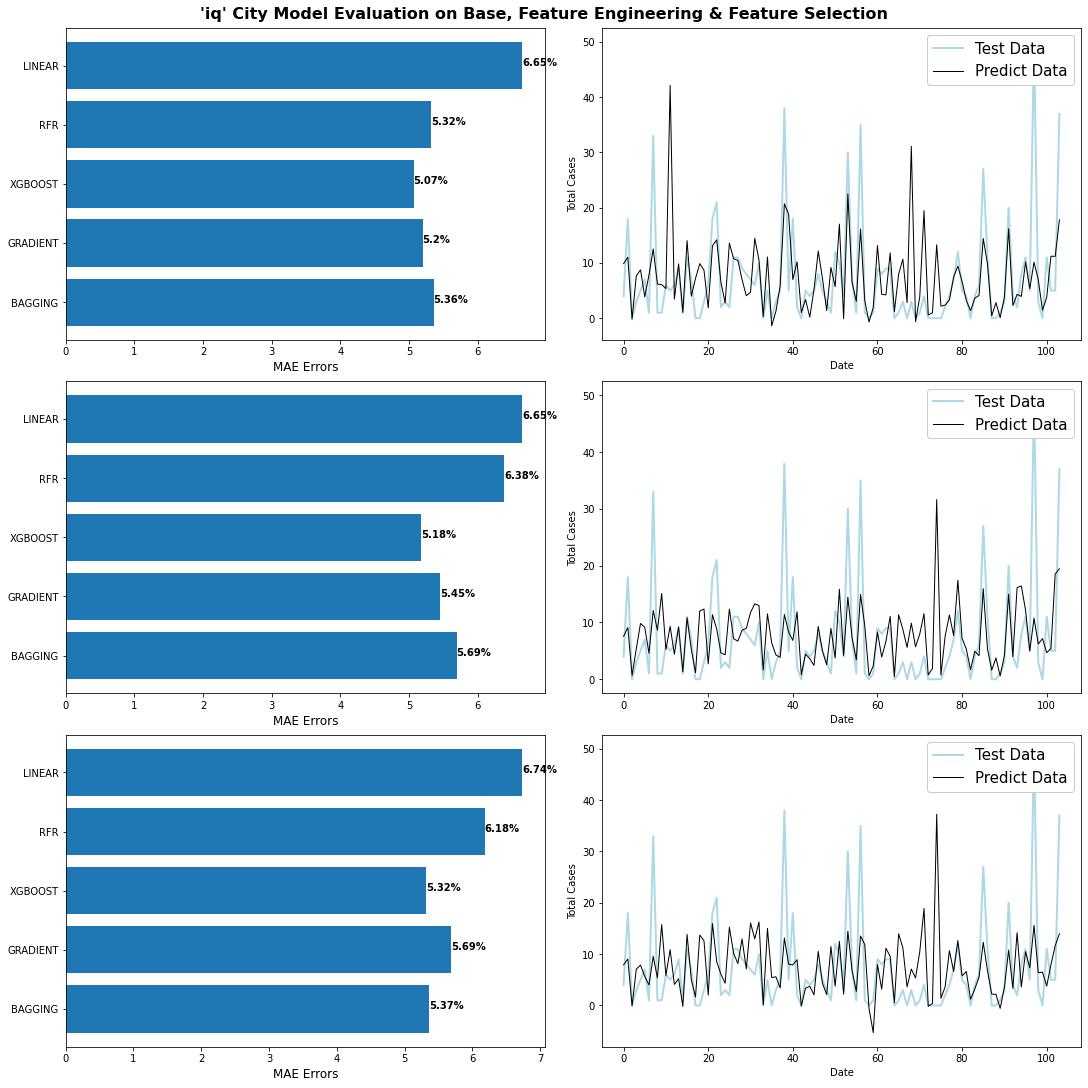

In [45]:
metrics_var = "MAE"

fig = plt.figure(figsize=(15, 15), constrained_layout=True)
spec = gridspec.GridSpec(nrows=3, ncols=2, figure=fig)

# # Base
ax0 = fig.add_subplot(spec[0, 0])
labels = base_iq_metrics_df["MODEL"]
y_pos = np.arange(len(labels))
ax0.barh(y_pos, base_iq_metrics_df[metrics_var], align="center")
ax0.set_yticks(y_pos, labels=labels)
ax0.invert_yaxis()
ax0.set_xlabel("MAE Errors", fontsize=12)
ax0.tick_params(axis='x', which='minor', labelsize=12)
ax0.tick_params(axis='y', which='minor', labelsize=12)
for i, v in enumerate(base_iq_metrics_df[metrics_var]):
    ax0.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")

ax1 = fig.add_subplot(spec[0, 1])
ax1.plot(base_iq_predict_df["y_test"], linewidth=2, label='Test Data', color='lightblue')
ax1.plot(base_iq_predict_df["GRADIENT_total_cases"], linewidth=1, label='Predict Data', color="black", linestyle="-")
ax1.legend(loc=1, framealpha=1, prop={'size': 15})
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Cases")

# # With Feature Engineering
ax2 = fig.add_subplot(spec[1, 0])
labels = fe_iq_metrics_df["MODEL"]
y_pos = np.arange(len(labels))
ax2.barh(y_pos, fe_iq_metrics_df[metrics_var], align="center")
ax2.set_yticks(y_pos, labels=labels)
ax2.invert_yaxis()
ax2.set_xlabel("MAE Errors", fontsize=12)
ax2.tick_params(axis='x', which='minor', labelsize=12)
ax2.tick_params(axis='y', which='minor', labelsize=12)
for i, v in enumerate(fe_iq_metrics_df[metrics_var]):
    ax2.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")

ax3 = fig.add_subplot(spec[1, 1])
ax3.plot(fe_iq_predict_df["y_test"], linewidth=2, label='Test Data', color='lightblue')
ax3.plot(fe_iq_predict_df["GRADIENT_total_cases"], linewidth=1, label='Predict Data', color="black", linestyle="-")
ax3.legend(loc=1, framealpha=1, prop={'size': 15})
ax3.set_xlabel("Date")
ax3.set_ylabel("Total Cases")

# # Base + Feature Selection
ax4 = fig.add_subplot(spec[2, 0])
labels = fs_iq_metrics_df["MODEL"]
y_pos = np.arange(len(labels))
ax4.barh(y_pos, fs_iq_metrics_df[metrics_var], align="center")
ax4.set_yticks(y_pos, labels=labels)
ax4.invert_yaxis()
ax4.set_xlabel("MAE Errors", fontsize=12)
ax4.tick_params(axis='x', which='minor', labelsize=12)
ax4.tick_params(axis='y', which='minor', labelsize=12)
for i, v in enumerate(fs_iq_metrics_df[metrics_var]):
    ax4.text(v, i, str("{}%".format(round(v, 2))), fontweight="bold")

ax5 = fig.add_subplot(spec[2, 1])
ax5.plot(fs_iq_predict_df["y_test"], linewidth=2, label='Test Data', color='lightblue')
ax5.plot(fs_iq_predict_df["GRADIENT_total_cases"], linewidth=1, label='Predict Data', color="black", linestyle="-")
ax5.legend(loc=1, framealpha=1, prop={'size': 15})
ax5.set_xlabel("Date")
ax5.set_ylabel("Total Cases")

fig.suptitle("'iq' City Model Evaluation on Base, Feature Engineering & Feature Selection", fontsize=16, fontweight="bold")

<font size="5px" face="sans-serif">Using Feature Importance from Model to interpret features to <code>total_cases</code> in model</font>

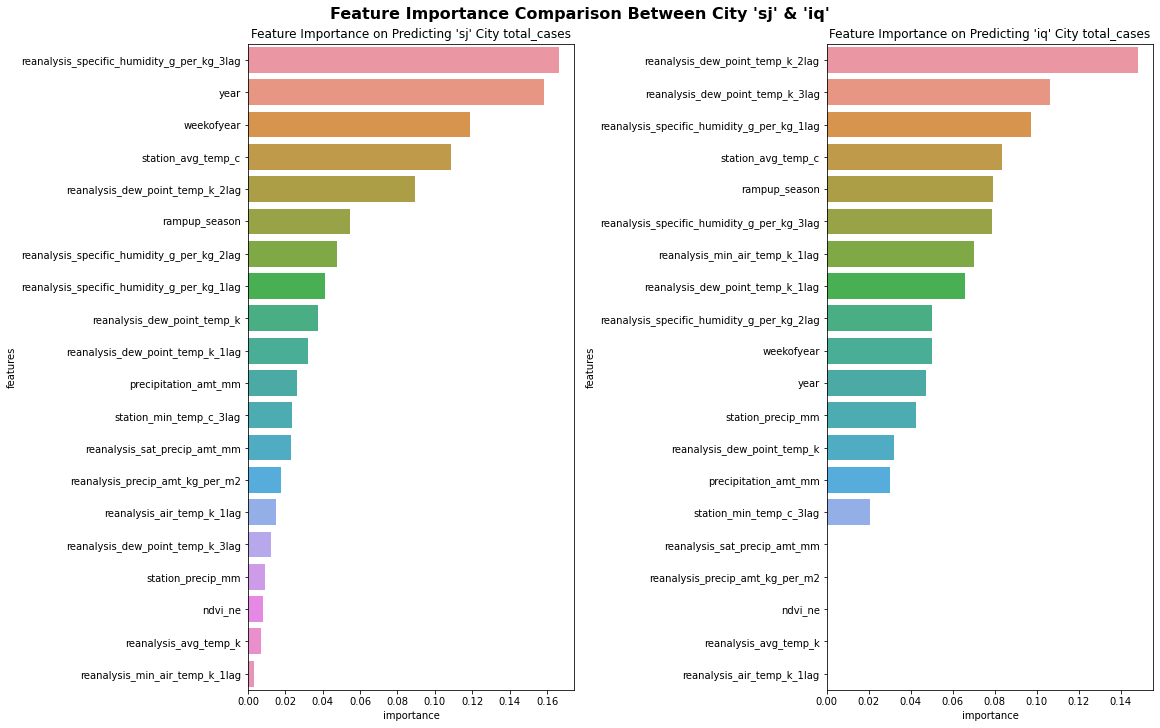

In [46]:
feature_importance_plot(iq_X_train, fs_iq_model["Algorithm"][3], fs_sj_model["Algorithm"][2])

<font size="5px" face="sans-serif">Using SHAP to interpret features to <code>total_cases</code> in model</font>

<font size="4px">Use only <b>'sj' city</b> for model interpretation</font>

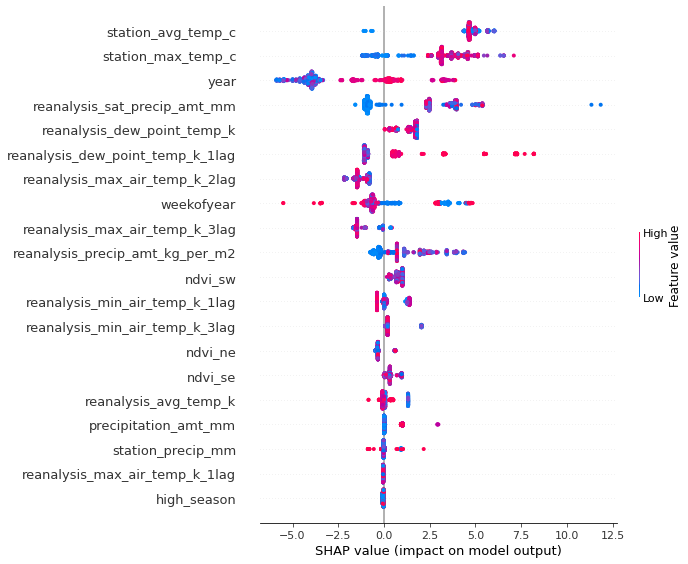

In [47]:
sj_shap_values = shap.TreeExplainer(fs_sj_model["Algorithm"][3]).shap_values(sj_X_train)
shap.summary_plot(sj_shap_values, sj_X_train)

In [48]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(fs_sj_model["Algorithm"][3])
    shap_values_Model = explainerModel.shap_values(sj_S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], sj_S.iloc[[j]])
    return(p)

In [49]:
sj_X_output = sj_X_test.copy()
sj_X_output.loc[:,'predict'] = np.round(fs_sj_model["Algorithm"][3].predict(sj_X_output),2)

random_picks = np.arange(1, 188, 50)
sj_S = sj_X_output.iloc[random_picks]

In [50]:
shap.initjs()

In [51]:
sj_X_train.mean()

year                               2006.80
station_max_temp_c                   31.60
weekofyear                           26.65
reanalysis_dew_point_temp_k         295.12
station_precip_mm                    27.00
precipitation_amt_mm                 36.72
ndvi_sw                               0.17
reanalysis_sat_precip_amt_mm         36.72
reanalysis_precip_amt_kg_per_m2      29.66
reanalysis_dew_point_temp_k_1lag    295.13
ndvi_ne                               0.06
high_season                           0.45
reanalysis_max_air_temp_k_3lag      301.40
ndvi_se                               0.18
station_avg_temp_c                   27.00
reanalysis_min_air_temp_k_3lag      297.30
reanalysis_avg_temp_k               299.28
reanalysis_max_air_temp_k_1lag      301.41
reanalysis_min_air_temp_k_1lag      297.31
reanalysis_max_air_temp_k_2lag      301.39
dtype: float64

In [52]:
shap_plot(0)

From the <b>SHAP</b> chart:
    - The output value is the prediction for that observation (the prediction of the first row is $8.06$).
    - <b>Red/blue</b>: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.
    - <code>station_max_temp_c</code> has high positive impact to predict <code>total_cases</code>, the value is $34.4$, which is higher than the mean $31.60$.
    - <code>weekofyear</code> has negative impact to predict <code>total_cases</code>, A higher than the average value ($=36 > 26$) drives the prediction to the left.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Conclusion & Recommendation</h2>
</div>

<font size="5px" face="sans-serif"><ins>Conclusion</ins></font>

1. Temperature and humidity has the high feature correlation with <code>total_cases</code>.

2. <b>Random Search</b> are choosen to be used as the hyperparameter tuning method because the it has faster computation speed compared to <b>Grid Seach</b>.

3. Model summary are as below:
<img src="img/model_summary_with_best.png" alt="agenda" height="400" width="800">
    
    - After <b>feature engineering</b>, the results improves with better score on <code>MAE</code> and <code>R2 Score</code>.
    - Besides, <b>feature selection</b> also do not improve the results, it has same performance as <b>feature engineering</b> but has shorter computation time. 

4. <b>iq</b> city performs in prediction of <code>total_cases</code>, further work can be done on this by treating this data as time series forecasting, instead of prediction. 

5. We can also use <b>SHAP</b> to explain the model, drilling down to each observation at one time.

6. Data serves as the bottleneck for predicting the <code>total_cases</code>.

<font size="5px" face="sans-serif"><ins>Recomendation</ins></font>

1. New data on socialeconomics can be scraped from online to improve the variety of data and making the model more robust.

2. Time series can be explored by treading the challenge as forecasting, instead of prediction as the input variables do not have high correlation with the target variable, <code>total_cases</code>.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>References</h2>
</div>

Ahmad, R., Suzilah, I., Wan Najdah, W. M. A., Topek, O., Mustafakamal, I., & Lee, H. L. (2018). Factors determining dengue outbreak in Malaysia. PLOS ONE, 13(2), e0193326. https://doi.org/10.1371/journal.pone.0193326



Jain, R., Sontisirikit, S., Iamsirithaworn, S., & Prendinger, H. (2019). Prediction of dengue outbreaks based on disease surveillance, meteorological and socio-economic data. BMC Infectious Diseases, 19(1). https://doi.org/10.1186/s12879-019-3874-x 



Liu, X., Liu, K., Yue, Y., Wu, H., Yang, S., Guo, Y., Ren, D., Zhao, N., Yang, J., & Liu, Q. (2021). Determination of Factors Affecting Dengue Occurrence in Representative Areas of China: A Principal Component Regression Analysis [Original Research]. Frontiers in Public Health, 8(1012). https://doi.org/10.3389/fpubh.2020.603872 



Salim, N. A. M., Wah, Y. B., Reeves, C., Smith, M., Yaacob, W. F. W., Mudin, R. N., Dapari, R., Sapri, N. N. F. F., & Haque, U. (2021). Prediction of dengue outbreak in Selangor Malaysia using machine learning techniques. Scientific Reports, 11(1). https://doi.org/10.1038/s41598-020-79193-2 


Rasli, R., Cheong, Y. L., Che Ibrahim, M. K., Farahininajua Fikri, S. F., Norzali, R. N., Nazarudin, N. A., ... & Lee, H. L. (2021). Insecticide resistance in dengue vectors from hotspots in Selangor, Malaysia. PLoS neglected tropical diseases, 15(3), e0009205.



Md. Siddikur Rahman, Chamsai Pientong, Sumaira Zafar, Tipaya Ekalaksananan, Richard E. Paul, Ubydul Haque, Joacim Rocklöv, Hans J. Overgaard, Mapping the spatial distribution of the dengue vector Aedes aegypti and predicting its abundance in northeastern Thailand using machine-learning approach, One Health, Volume 13, 2021, 100358, ISSN 2352-7714,
https://doi.org/10.1016/j.onehlt.2021.100358.



Sriklin, T., Puttinaovarat, S., & Kajornkasirat, S. RISK MAP OF DENGUE CASE IN THE SOUTHERNMOST PROVINCES OF THAILAND USING A MACHINE LEARNING. Turkish Journal of Physiotherapy and Rehabilitation, 32, 3.



Şenol, A., Canbay, Y., & Mahmut, K. A. Y. A. Trends in Outbreak Detection in Early Stage by Using Machine Learning Approaches. Bilişim Teknolojileri Dergisi, 14(4), 355-366.



Zhou, Y., Liu, H., Leng, P. et al. Analysis of the spatial distribution of Aedes albopictus in an urban area of Shanghai, China. Parasites Vectors 14, 501 (2021). https://doi.org/10.1186/s13071-021-05022-8